In [1]:
%matplotlib ipympl
import time
import traceback
from onix.data_tools import get_experiment_data
from functools import partial
from onix.analysis.fitter import Fitter
from onix.analysis.helper import group_and_average_data
import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt
from tqdm import tqdm
import pprint

In [2]:
def gaussian(f, f_0, a, sigma, b, c):
    numerator = (f - f_0) ** 2
    denominator = 2 * sigma ** 2
    return a * np.exp(-numerator / denominator) + c + b * (f - f_0)

def get_gaussian_fit(detunings, voltages, p0=None, bounds=None):
    fitter = Fitter(gaussian)
    fitter.set_absolute_sigma(False)
    fitter.set_data(detunings, voltages)
    fitter.set_p0({"f_0": 0, "c": 0.4, "b": 0, "sigma": 1})
    if p0 is not None:
        fitter.set_p0(p0)
    if bounds is not None:
        for bound_var, bound in bounds.items():
            fitter.set_bounds(bound_var, bound[0], bound[1])
    fitter.fit(maxfev = 10000)
    return fitter

In [3]:
fitter_results = {
    "antihole" : {
        "positive": [],
        "negative": [],
    },
    "rf": {
        "positive": [],
        "negative": [],
    }
}
fitter_errors = {
    "antihole" : {
        "positive": [],
        "negative": [],
    },
    "rf": {
        "positive": [],
        "negative": [],
    }
}

In [5]:
data_range = (213025, 213124)
data_length = data_range[1] - data_range[0] + 1
n_row = 10
n_col = 10

fig, axs = plt.subplots(n_row, n_col, figsize=(14, 14), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)
data_numbers = range(data_range[0], data_range[1]+1)

for kk, (ax, data_number) in tqdm(enumerate(zip(axs.ravel(), data_numbers))):
    data, headers = get_experiment_data(data_number)
    
    
    
    antihole_normalized = transmissions_avg["antihole"]
    rf_normalized = transmissions_avg["rf"]
    
    for polarity in ["positive", "negative"]:
        transmissions_avg = group_and_average_data(data["transmissions_avg"], headers["params"]["detect"]["cycles"])
        detunings_MHz = headers["detunings"].to("MHz").magnitude
        if polarity            
        mask = detunings_MHz > 0
        elif polarity            mask = detunings_MHz < 0

        # plot data
        ax.scatter(detunings_MHz[mask], antihole_normalized[mask], color="C1", marker='.'        ax.scatter(detunings_MHz[mask], rf_normalized[mask], color="C2", marker='.')
        
     fits    #
        antihole_fit = get_gaussian_fit(detunings_MHz[mask], antihole_normalized[mask], p0={"a":-1}, bounds={"a": [-1, 0]})
    rf_fit = get_gaussian_fit(detunings_MHz[mask], rf_normalized[mask], p0={"a":-1}, bounds={"a": [-1, 0]})
        fitter_results["antihole"][polarity].append(antihole_fit.results)
        fitter_errors["antihole"][polarity].append(antihole_fit.errors)
        fitter_results["rf"][polarity].append(rf_fit.results)
        fitter_errors["rf"][polarity].append(rf_fit.errors)
        
        # plot fits
        xaxis = np.linspace(min(detunings_MHz[mask]), max(detunings_MHz[mask]), 1000)
    ax.plot(xaxis, antihole_fit.fitted_value(xaxis), color="C1")
    ax.plot(xaxis, rf_fit.fitted_value(xaxis), color="C2")

        ax.text(.01, .99, f"{kk+1}", ha='left', va='top', transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

print("First chasm params:\n")
pprint.pprint(get_experiment_data(data_numbers[0])[1]["params"]["chasm"])
print("Other chasm params:\n")
pprint.pprint(get_experiment_data(data_numbers[1])[1]["params"]["chasm"])            )
 == "negative":
 == "positive":

plt.show()

IndentationError: unindent does not match any outer indentation level (<string>, line 46)

In [6]:
def get_from_fitter_results(fitter_results, data_type, polarity, param, max_n = None):
    data_to_plot = []
    if max_n is None:
        max_n = len(fitter_results[data_type][polarity])
    for ll in range(max_n):
        data_to_plot.append(fitter_results[data_type][polarity][ll][param])
    return np.array(data_to_plot)

IndexError: list index out of range

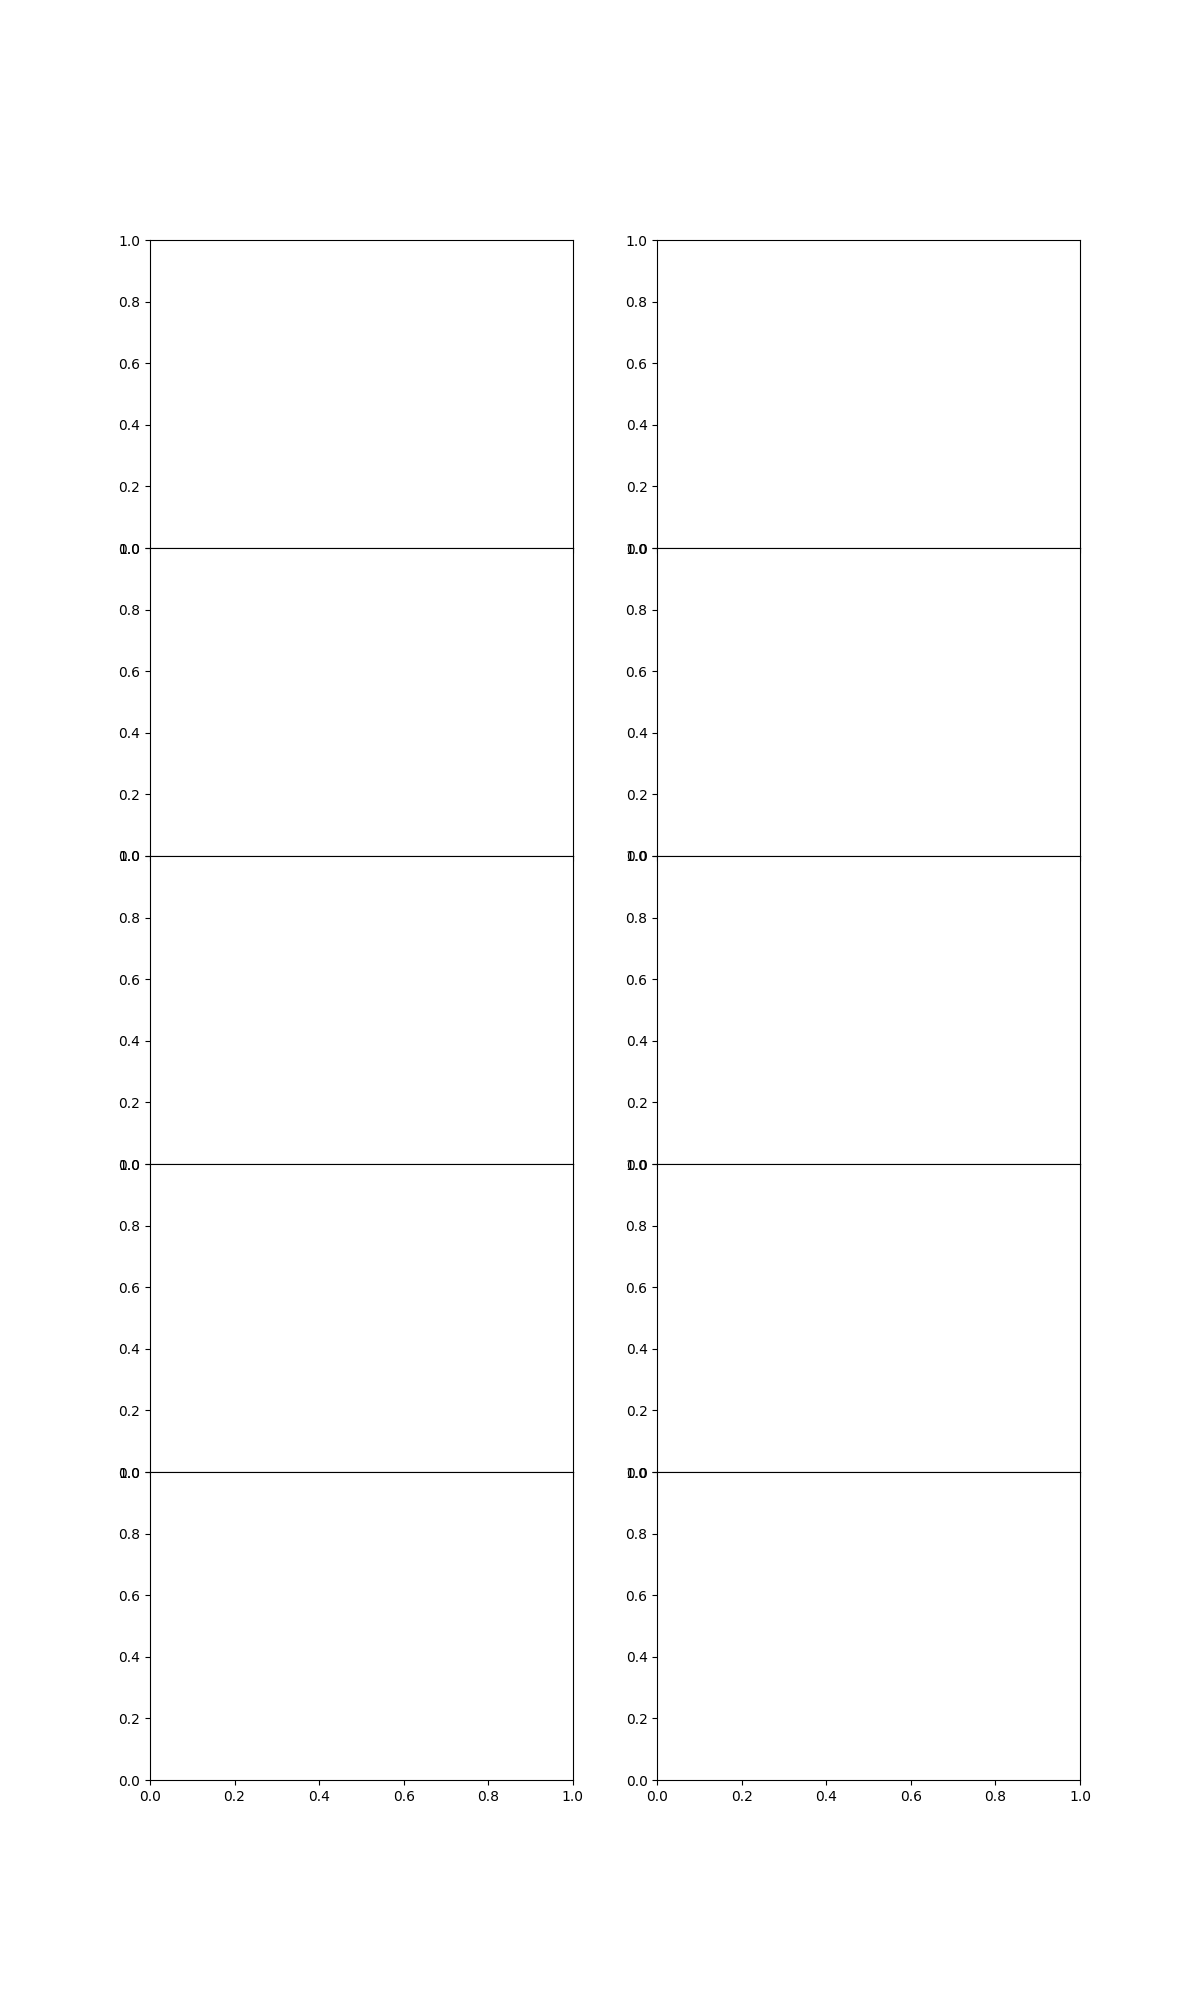

In [7]:
nlen = len(fitter_results["antihole"]["positive"])
nlen = 40
params = ["a", "sigma", "f_0", "b", "c"]
fig, axs = plt.subplots(len(params), 2, figsize=(12, 4*len(params)), sharex=True)
fig.subplots_adjust(hspace=0)
for kk, param in enumerate(params):
    for data_type in ["antihole", "rf"]:
        for polarity in ["positive", "negative"]:
            xs = range(1, nlen+1)
            ys = get_from_fitter_results(fitter_results, data_type, polarity, param, nlen)
            errors = get_from_fitter_results(fitter_errors, data_type, polarity, param, nlen)
            axs[kk, 0].errorbar(xs, np.abs(ys), np.abs(errors), label=f"ampliude fit - {data_type} - {polarity}", marker='.')
    axs[kk, 0].set_ylabel(f"abs({param}) fit")
    
    for polarity in ["positive", "negative"]:
        xs = range(1, nlen+1)
        ys_antihole = get_from_fitter_results(fitter_results, "antihole", polarity, param, nlen)
        ys_rf = get_from_fitter_results(fitter_results, "rf", polarity, param, nlen)
        ys = ys_rf / ys_antihole
        axs[kk, 1].plot(xs, np.abs(ys), label=f"{polarity}")
        axs[kk, 1].set_ylabel(f"{param} rf/ah ratio")

axs[0, 0].legend()
axs[0, 1].legend()
plt.xlabel("data index")
plt.tight_layout()
plt.show()